# TP3

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import sobel

### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

(<Axes: >, <matplotlib.image.AxesImage at 0x7fa2ed8e9850>)

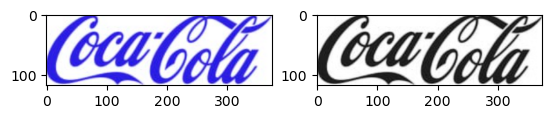

In [7]:
image_template = cv2.imread('TP3/template/pattern_2.png')
image_template_bw = cv2.cvtColor(image_template, cv2.COLOR_BGR2GRAY)
plt.subplots(1,2)
plt.subplot(121), plt.imshow(image_template, cmap='gray')
plt.subplot(122), plt.imshow(image_template_bw, cmap='gray')

In [127]:
image_template = cv2.imread('TP3/template/pattern.png', cv2.IMREAD_GRAYSCALE)
# w, h = image_template.shape[::-1]

image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', cv2.IMREAD_GRAYSCALE)
print(image_1.shape)
image_2 =  cv2.imread('TP3/images/coca_logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_2.shape)
image_3 =  cv2.imread('TP3/images/coca_logo_2.png', cv2.IMREAD_GRAYSCALE)
print(image_3.shape)
image_4 =  cv2.imread('TP3/images/coca_multi.png', cv2.IMREAD_GRAYSCALE)
print(image_4.shape)
image_5 =  cv2.imread('TP3/images/coca_retro_1.png', cv2.IMREAD_GRAYSCALE)
print(image_5.shape)
image_6 =  cv2.imread('TP3/images/coca_retro_2.png', cv2.IMREAD_GRAYSCALE)
print(image_6.shape)
image_7 =  cv2.imread('TP3/images/logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_7.shape)


(1389, 1389)
(500, 207)
(363, 233)
(598, 799)
(493, 715)
(429, 715)
(450, 687)


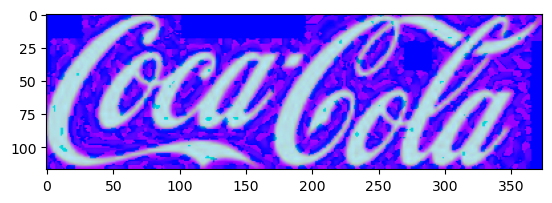

In [14]:
image_template = cv2.imread('TP3/template/pattern_2.png')
image_template_hsv = cv2.cvtColor(image_template, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_template_hsv)
plt.imshow(image_template_hsv)
# plt.imshow(image_template_hsv)

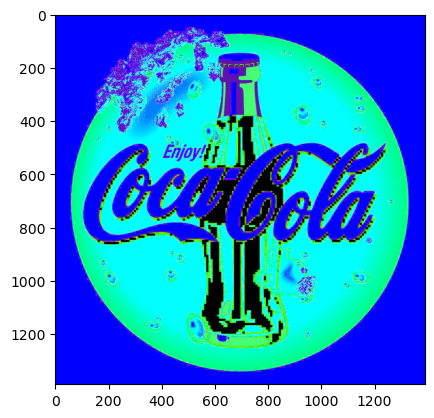

In [13]:
image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg')
image_1_hsv = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_1_hsv)
plt.imshow(image_1_hsv, cmap='gray')

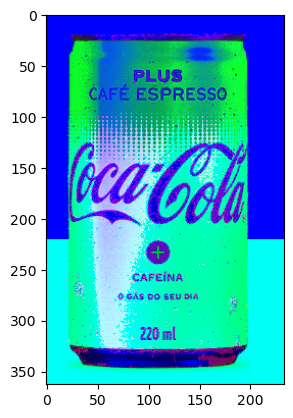

In [15]:
image_2 =  cv2.imread('TP3/images/coca_logo_2.png')
image_2_hsv = cv2.cvtColor(image_2, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_2_hsv)
plt.imshow(image_2_hsv)

In [63]:
class ImageTemplate:
    def __init__(self, template_path):
        self._template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        self._height, self._width = self._template.shape
        
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
    @property
    def image(self):
        return self._template
    
    def preprocess(self, x_scale, y_scale):
        if x_scale < 0.3 or y_scale < 0.3:
            x_scale, y_scale = 0.3, 0.3
        # resize template
        result = cv2.resize(self._template, None, fx=x_scale, fy=y_scale, interpolation=cv2.INTER_LINEAR)
        # Apply canny and return
        kernel_size = int(min(result.shape[0], result.shape[1]) / 100) | 1

        # result = cv2.GaussianBlur(result, (kernel_size, kernel_size), 0)
        result = cv2.Canny(result, 25, 100, )
        # kernel = np.ones((5, 5), np.uint8)
        # result = cv2.dilate(result, kernel, iterations=1)
        return result.copy()

{0, 255}

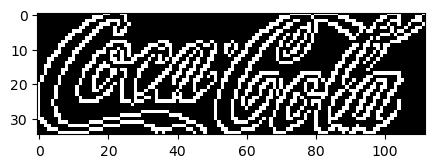

In [64]:
template_path = 'TP3/template/pattern_2.png'
template = ImageTemplate(template_path)
template_image = template.preprocess(0.1,0.1)
plt.figure(figsize=(5, 5))
# plt.imshow(template.preprocess(0.3,0.3), cmap='gray')
plt.imshow(template.preprocess(0.1,0.1), cmap='gray')
# np.max(template.preprocess(5,5))
set(template.preprocess(0.1,0.1).flatten())

  

In [65]:
def auto_canny(image, sigma=0.7):
    # Calcula la mediana de los píxeles de la imagen
    v = np.median(image)

    # Define los umbrales bajo y alto basados en la mediana
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))

    # Aplicar Canny con los umbrales calculados
    edges = cv2.Canny(image, lower, upper)
    return edges

def preprocess_image(image):
    result = image
    kernel_size = int(min(result.shape[0], result.shape[1]) / 100) | 1
    print(kernel_size)
    result = cv2.GaussianBlur(result, (kernel_size, kernel_size), 0)
    
    result = cv2.Canny(result,100,450)
    
    
    # kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # result = cv2.dilate(result, kernel, iterations=1)
    # result = cv2.GaussianBlur(image,(1,13),0)
    # result = auto_canny(result)
    
    return result    

5


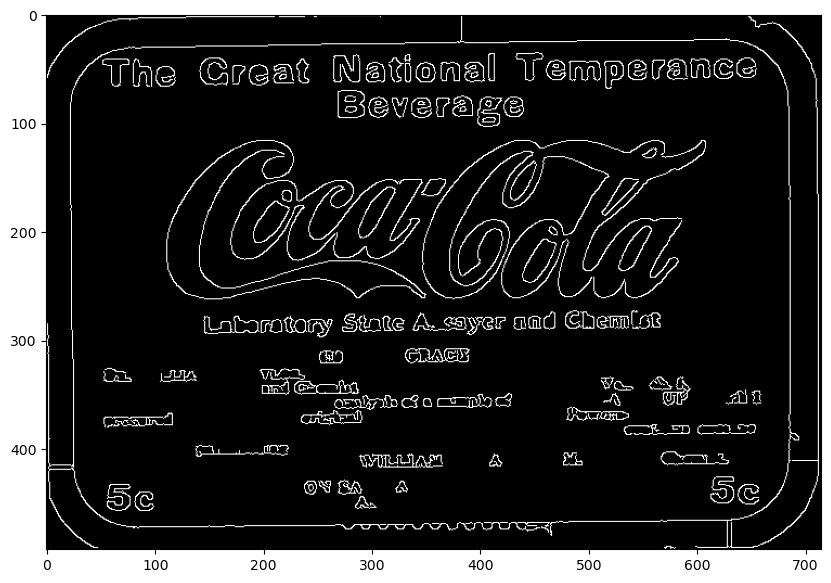

In [66]:
# Image preprocessing
image_1_binary = preprocess_image(image_5)
plt.figure(figsize=(10, 10))
plt.imshow(image_1_binary, cmap='gray')
# set(image_1_binary.flatten())
# cv2.imshow("", image_1_binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [67]:
print(image_3.shape)
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.10
start_point = (image_surface*proportion)/template_surface
print(start_point)

(363, 233)
0.5035642857142857


0.25178214285714284
-6.996746151344269e-07 0.2705305516719818 (23, 80) (307, 33)


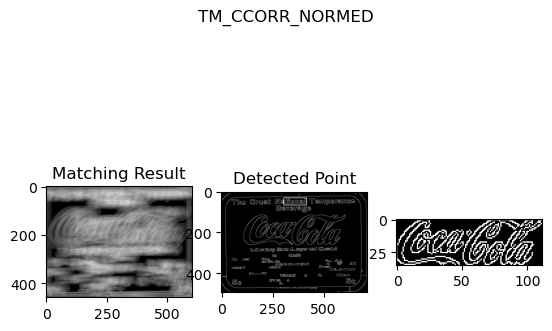

-1.251078316499843e-07 0.21598047018051147 (501, 64) (426, 191)


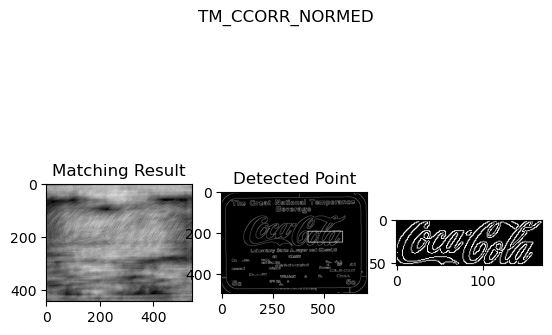

0.020624225959181786 0.1775188148021698 (349, 392) (251, 188)


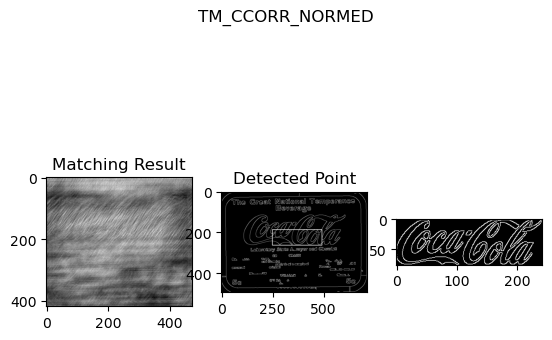

0.03308939188718796 0.14263032376766205 (330, 394) (140, 132)


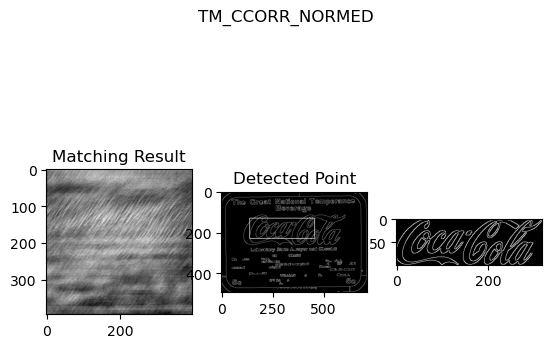

0.03593343496322632 0.13389264047145844 (112, 336) (198, 114)


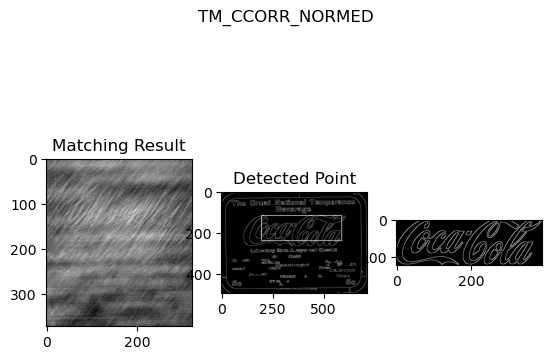

0.03884338214993477 0.13216741383075714 (86, 316) (121, 115)


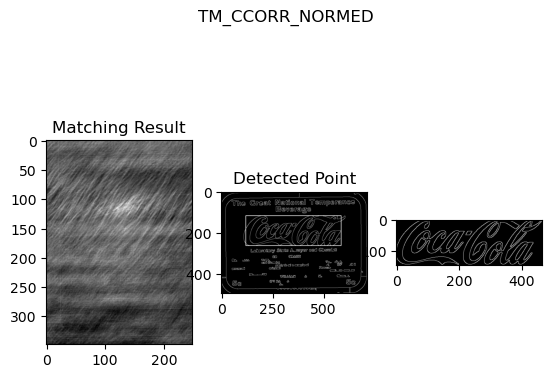

0.04024374112486839 0.12620018422603607 (93, 287) (81, 96)


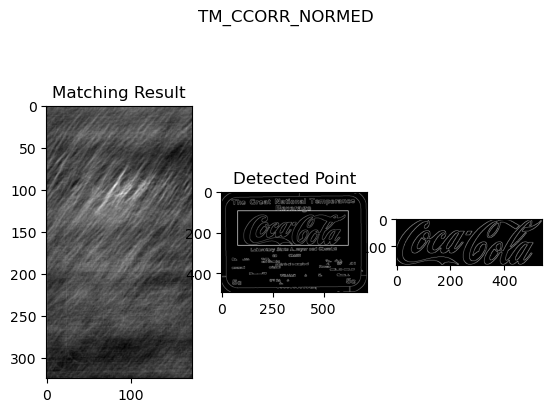

0.039063189178705215 0.09417715668678284 (12, 287) (97, 99)


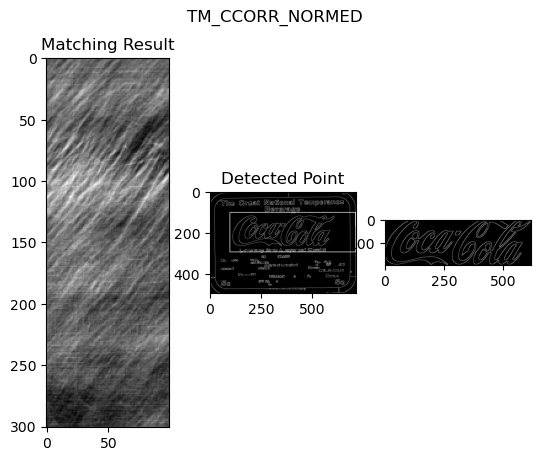

0.038663528859615326 0.07585086673498154 (22, 270) (1, 96)


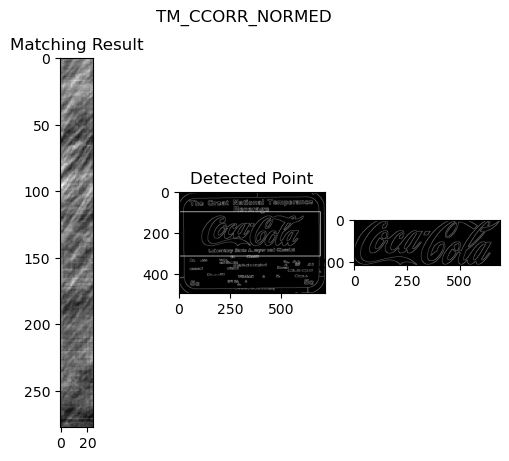

OpenCV(4.10.0) /home/conda/feedstock_root/build_artifacts/libopencv_1717728587725/work/modules/imgproc/src/templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'matchTemplate'

SALIMOS
Maximo valor 0.2705305516719818


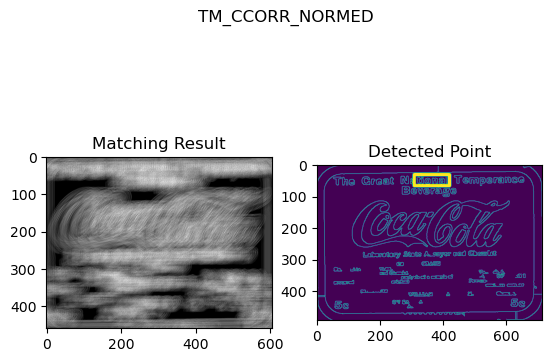

In [68]:
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'v']
 
# scales = np.linspace(1, 20, 10) # image_1
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.05
start_point = (image_surface*proportion)/template_surface
print(start_point)
scales = np.linspace(start_point
                     , 20, 100) # image_3
max_value = 0
img_max = None
for scale in scales:
    # print(scale)
    image_template_binary_resize = template.preprocess(x_scale=scale, y_scale=scale) #y_scale=1)
    # print(image_template_binary_resize.shape)
    
    img = image_1_binary.copy()
    cv2.pyrDown(img,img)
    cv2.pyrDown(img,img)
    # method = getattr(cv2, meth)
 
    # Apply template Matching
    try:
        res = cv2.matchTemplate(img,image_template_binary_resize, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF_NORMED)

    except Exception as e:
        print(e)
        print('SALIMOS')
        break
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc)

    top_left = max_loc
    w, h = image_template_binary_resize.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(131),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result')
    plt.subplot(132),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), 
    plt.suptitle('TM_CCORR_NORMED')
    plt.subplot(133),plt.imshow(image_template_binary_resize,cmap = 'gray')
    plt.show()
 
    if max_val > max_value:
        img_max = img
        top_left_max = max_loc
        w, h = image_template_binary_resize.shape[::-1]
        bottom_right_max = (top_left_max[0] + w, top_left_max[1] + h)
        max_value = max_val
        res_1 = res
 
print("Maximo valor {max_value}".format(max_value=max_value))
cv2.rectangle(img_max,top_left_max, bottom_right_max, 255, 10)
 
plt.subplot(121),plt.imshow(res_1,cmap = 'gray')
plt.title('Matching Result')
plt.subplot(122),plt.imshow(img_max)
plt.title('Detected Point'), 
plt.suptitle('TM_CCORR_NORMED')
plt.show()

Con descriptores. Me canse del matchtemplate

In [76]:
# Cargar imagen de referencia y la imagen donde buscar el logo
img_template = cv2.imread('TP3/template/pattern.png', 0)
img_template = cv2.resize(img_template,None, fx=3, fy=3)
image_template = cv2.GaussianBlur(image_template, (3, 3), 0)

img_template = cv2.Canny(img_template,100,150)
print("Tamaño del template ", img_template.shape)

# img_scene = cv2.imread('TP3/images/logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_logo_2.png', 0)
# img_scene = cv2.imread('TP3/images/logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_retro_2.png', 0)
# img_scene = cv2.imread('TP3/images/coca_retro_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_multi.png', 0)
img_scene = cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', 0)


print("Tamaño de la imagen ", img_scene.shape)
kernel_size = int(min(img_scene.shape[0], img_scene.shape[1]) / 100) | 1
img_scene = cv2.GaussianBlur(img_scene, (kernel_size, kernel_size), 0)
img_scene = cv2.Canny(img_scene,100,300)
print(kernel_size)
# Crear el detector ORB (puedes usar SIFT o SURF si están disponibles)
# orb = cv2.ORB_create()
sift = cv2.SIFT_create()

# Detectar puntos clave y descriptores
kp_logo, des_logo = sift.detectAndCompute(img_template, None)
kp_scene, des_scene = sift.detectAndCompute(img_scene, None)

Tamaño del template  (525, 1200)
Tamaño de la imagen  (1389, 1389)
13


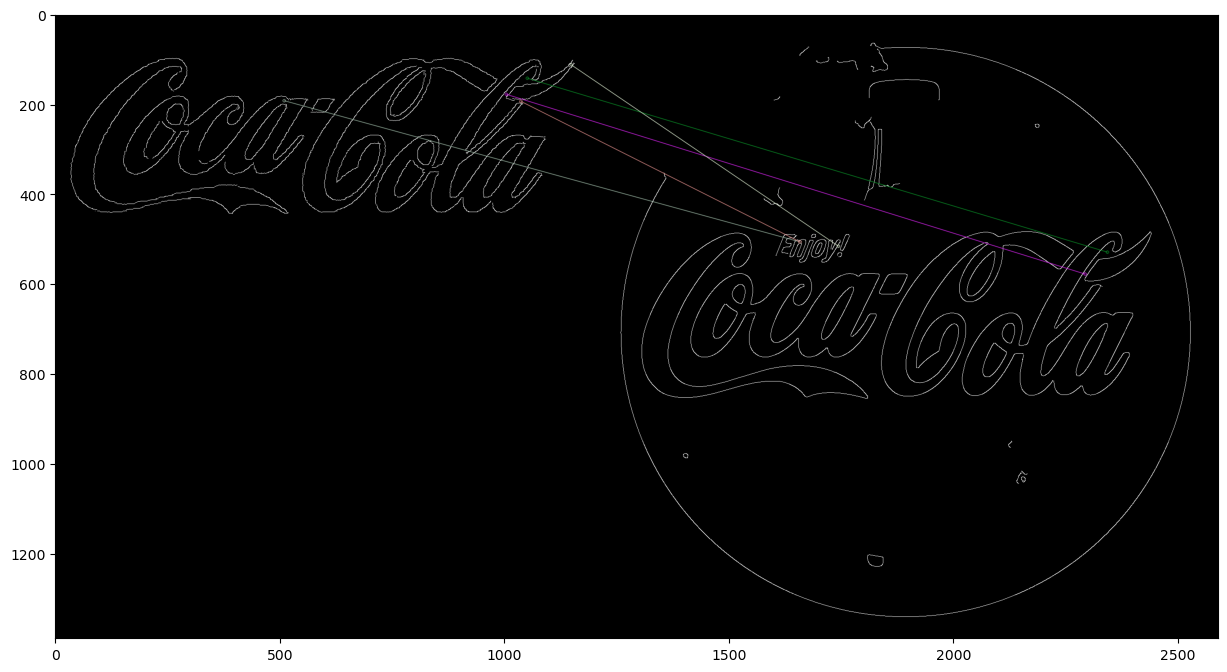

(<matplotlib.image.AxesImage at 0x7fa2de4ed130>, None)

In [77]:
#create BFMatcher object
bf = cv2.BFMatcher()
 
# Match descriptors.
matches = bf.knnMatch(des_logo,des_scene, k=2)

# Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)
 
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.rectangle(img_scene,(int(np.min(x_pts)*0.8), int(np.min(y_pts)*0.8)), (int(np.max(x_pts)*1.2), int(np.max(y_pts)*1.2)), 255, 10)
img3 = cv2.drawMatchesKnn(img_template,kp_logo,img_scene,kp_scene,good,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# img3 = cv2.drawMatches(img_template, kp_logo, img_scene, kp_scene, matches[:8], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# img3 = cv2.drawKeypoints(img_scene, kp_scene, img_scene)
plt.figure(figsize=(15,15))
plt.imshow(img3, cmap='gray'),plt.show()

In [51]:
print(np.max(dst_pts))

NameError: name 'dst_pts' is not defined

In [140]:
# Cargar la imagen del logo de referencia y la imagen donde buscar el logo
img_logo = img_template
# img_scene = cv2.imread('escena.jpg', cv2.IMREAD_GRAYSCALE)

# Iniciar el detector SIFT
sift = cv2.SIFT_create()

# Detectar los puntos clave y descriptores en ambas imágenes
keypoints_logo, descriptors_logo = sift.detectAndCompute(img_logo, None)
keypoints_scene, descriptors_scene = sift.detectAndCompute(img_scene, None)


bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.knnMatch(descriptors_logo,descriptors_scene, k=2)
# Aplicar ratio test de Lowe para eliminar falsos positivos
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


# Necesitas al menos 4 buenos matches para calcular la homografía
if len(good_matches) > 4:
    # Obtener los puntos correspondientes en ambas imágenes
    src_pts = np.float32([keypoints_logo[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la homografía usando RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 3.0)

    # Obtener las dimensiones del logo
    h, w = img_logo.shape

    # Definir los puntos del logo en la imagen original
    pts_logo = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

    # Aplicar la homografía para transformar los puntos del logo en la imagen objetivo
    dst = cv2.perspectiveTransform(pts_logo, H)

    # Dibujar un contorno alrededor del logo detectado
    img_scene = cv2.polylines(img_scene, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)

    # Mostrar el resultado
    cv2.imshow("Logo detectado", img_scene)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No se encontraron suficientes coincidencias para calcular la homografía.")


Esta funcionando

In [2]:
def preprocess_template(template, x_scale, y_scale):
        if x_scale < 0.3 or y_scale < 0.3:
            x_scale, y_scale = 0.5, 0.5
        # resize template
        result = cv2.resize(template, None, fx=x_scale, fy=y_scale, interpolation=cv2.INTER_LINEAR)
        # Apply canny and return
        kernel_size = int(min(result.shape[0], result.shape[1]) / 100) | 1
        # result = cv2.GaussianBlur(result, (kernel_size, kernel_size), 0)
        result = cv2.Canny(result, 25, 100, )
        # kernel = np.ones((5, 5), np.uint8)
        # result = cv2.dilate(result, kernel, iterations=1)
        return result

In [15]:
def preprocess_image(image):
    result = image
    kernel_size = int(min(result.shape[0], result.shape[1]) / 100) | 1
    print(kernel_size)
    result = cv2.GaussianBlur(result, (kernel_size, kernel_size), 0)
    result = cv2.Canny(result,100,150) 
    result = cv2.pyrUp(result)
    result = cv2.pyrUp(result)
    # kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # result = cv2.dilate(result, kernel, iterations=1)
    # result = cv2.GaussianBlur(image,(1,13),0)
    # result = auto_canny(result)
    return result    

In [16]:
image_template = cv2.imread('TP3/template/pattern.png', cv2.IMREAD_GRAYSCALE)
# w, h = image_template.shape[::-1]

image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', cv2.IMREAD_GRAYSCALE)
print(image_1.shape)
image_2 =  cv2.imread('TP3/images/coca_logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_2.shape)
image_3 =  cv2.imread('TP3/images/coca_logo_2.png', cv2.IMREAD_GRAYSCALE)
print(image_3.shape)
image_4 =  cv2.imread('TP3/images/coca_multi.png', cv2.IMREAD_GRAYSCALE)
print(image_4.shape)
image_5 =  cv2.imread('TP3/images/coca_retro_1.png', cv2.IMREAD_GRAYSCALE)
print(image_5.shape)
image_6 =  cv2.imread('TP3/images/coca_retro_2.png', cv2.IMREAD_GRAYSCALE)
print(image_6.shape)
image_7 =  cv2.imread('TP3/images/logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_7.shape)

(1389, 1389)
(500, 207)
(363, 233)
(598, 799)
(493, 715)
(429, 715)
(450, 687)


In [17]:
def detect_logo(image_template, image_test):

    #Calculo las escalas
    h, w = image_test.shape
    h_t, w_t = image_template.shape
    image_surface = h*w
    template_surface = h_t * w_t
    proportion = 0.03
    start_point = (image_surface*proportion)/template_surface
    print(start_point)
    scales = np.linspace(start_point, 20, 100) # image_3

    max_value = 0
    img_max = None
    
    # preprocesamos imagen 
    image_preprocessed = preprocess_image(image_test)
    for scale in scales:
        # print(scale)
        image_template_resize = preprocess_template(image_template, x_scale=scale, y_scale=scale) 
        # print(image_template_binary_resize.shape)
        
        img = image_preprocessed.copy()
     
        # Apply template Matching
        try:
            res = cv2.matchTemplate(img,image_template_resize, cv2.TM_CCOEFF)
    
        except Exception as e:
            print(e)
            break
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
        top_left = max_loc
        w, h = image_template_resize.shape[::-1]
        bottom_right = (top_left[0] + w, top_left[1] + h)
     
        if max_val > max_value:
            img_max = img
            top_left_max = max_loc
            w, h = image_template_resize.shape[::-1]
            bottom_right_max = (top_left_max[0] + w, top_left_max[1] + h)
            max_value = max_val
            res_1 = res
     
    print("Maximo valor {max_value}".format(max_value=max_value))
    cv2.rectangle(img_max,top_left_max, bottom_right_max, 255, 10)
     
    plt.subplot(121),plt.imshow(res_1,cmap = 'gray')
    plt.title('Matching Result')
    plt.subplot(122),plt.imshow(img_max)
    plt.title('Detected Point'), 
    plt.suptitle('TM_CCOEFF')
    plt.show()

0.2047722857142857
5
OpenCV(4.10.0) /home/conda/feedstock_root/build_artifacts/libopencv_1717728587725/work/modules/imgproc/src/templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'matchTemplate'

Maximo valor 79574536.0


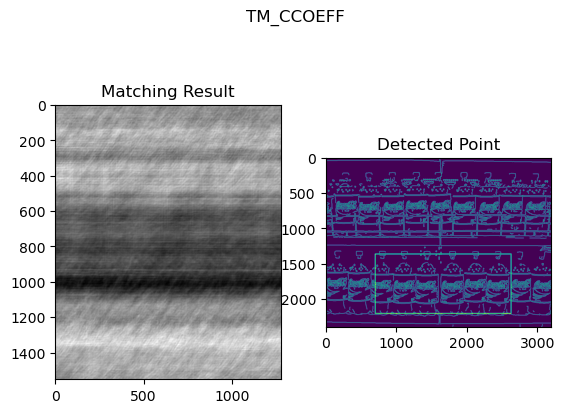

In [18]:
image = image_4.copy()
# cv2.pyrUp(image, image)
# cv2.pyrUp(image, image)
detect_logo(image_template, image)